#Análises exploratorio de datos sobre o dataset: football_transfers_2021.csv

In [2]:
# Cargamos as librarías
from google.colab import drive;

drive.mount('/content/drive')

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Mounted at /content/drive


In [4]:
datos = pd.read_csv("/content/drive/MyDrive/EDA/players.csv")

#O principal propósito do análise exploratorio é ter unha idea completa de cómo son os nosos datos, antes de decidir qué técnica da Ciencia de Datos ou de Machine Learning usaremos.

E como na práctica os datos non son ideais, debemos organizalos, entender o seu contido, entender cáles son as variables máis relevantes e cómo se relacionan unhas coas outras, comezar a ver alguns patróns, determinar qué facer cos datos faltantes e cos datos atípicos, e finalmente extraer conclusións acerca de todo este análisis.

Todo isto é precisamente o análise exploratorio de datos, que é en resumo unha forma de entender, visualizar e extraer información relevante do set de datos para poder decidir cál será a ruta ou técnica máis axeitada para o seu posterior procesamento.

Tendo esto claro, podemos resumir as fases do análise exploratorio en 7 pasos:

    1 Ter clara as preguntas que queremos responder;
    2 Ter unha idea xeral do noso dataset;
    3 Definilos tipos de datos que temos;
    4 Elexir o tipo de estatística descriptiva;
    5 Visualizar los datos;
    6 Analizalas posibles interaccións entre as variables do dataset
    8 Extraer algunhas conclusións de todo este análise.


##Neste caso imos empregar un dataset cos rexistros dos 250 xogadores máis vaiosos de fúbol no 2021
Para comezar imos facer unha primeira visual do dataset.

In [5]:
datos.head()

,Unnamed: 0,Name,Position,Age,Markey Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1
2,2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2
3,3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8
4,4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3


Imos ver máis información dos datos, nomes das columnas, tipo de datos que conteñen, número de referencias.
Vemos que o dataset consta de 16 columnas, das cales 11 son do tipo int64, 4 object e 1 float64
Tamén podemos ver o número de rexitros do que consta o dataset, neste caso 500 

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   500 non-null    int64  
 1   Name                         500 non-null    object 
 2   Position                     500 non-null    object 
 3   Age                          500 non-null    int64  
 4   Markey Value In Millions(£)  500 non-null    float64
 5   Country                      500 non-null    object 
 6   Club                         500 non-null    object 
 7   Matches                      500 non-null    int64  
 8   Goals                        500 non-null    int64  
 9   Own Goals                    500 non-null    int64  
 10  Assists                      500 non-null    int64  
 11  Yellow Cards                 500 non-null    int64  
 12  Second Yellow Cards          500 non-null    int64  
 13  Red Cards           

In [7]:
datos.shape


(500, 16)

In [8]:
columnas = list(datos.columns)
columnas

['Unnamed: 0',
 'Name',
 'Position',
 'Age',
 'Markey Value In Millions(£)',
 'Country',
 'Club',
 'Matches',
 'Goals',
 'Own Goals',
 'Assists',
 'Yellow Cards',
 'Second Yellow Cards',
 'Red Cards',
 'Number Of Substitute In',
 'Number Of Substitute Out']

#Copia de datos

##Facemos unha copia de datos para manter unha copia cos datos orixináis e cambio os nomes das columnas da copia para traballar con máis facilidade

In [9]:

futbolistas = datos.copy(deep=True)
futbolistas.to_csv('futbolistas_limpo.csv',index=False)
futbolistas.columns = ['Id',
                       'Nome',
                       'Posicion',
                       'Idade',
                       'Valor',
                       'Pais',
                       'Clube',
                       'Partidos',
                       'Goles',
                       'En_Propia',
                       'Asistencias',
                       'Amarelas',
                       'Segunda_Amarela',
                       'Vermella',
                       'Entrada_dendebanco',
                       'Cambiado']

#Limpeza de datos

Imos comprobar si o dataset ten moitos rexistros nulos

In [10]:
futbolistas.isnull().sum()

Id                    0
Nome                  0
Posicion              0
Idade                 0
Valor                 0
Pais                  0
Clube                 0
Partidos              0
Goles                 0
En_Propia             0
Asistencias           0
Amarelas              0
Segunda_Amarela       0
Vermella              0
Entrada_dendebanco    0
Cambiado              0
dtype: int64

Vemos que non temos nulos, co cal, evitamos ter que tratalos. No caso de ter valores nulos teríamos que buscar a mellor solución para procesalos, borrado, completar coa media, co valor anterior, posterior ou buscando outro tipo de relacción que nos permitise eliminar eses datos nulos sen modificar a calidade dos datos

O primeiro paso, a pregunta que queremos responder neste caso é,  ¿que tipo de fichaxe é máis caro?

E para responder a esta pregunta debemos botar un primero vistazo o dataset, mirarlo seu tamaño, determinar cáles son as características ou variables (é decir as columnas da taboa) e dar un primero barrido os rexistros ou observacións (é decir as filas do dataset):

##Comprobamos se existen filas duplicadas, no caso de existir eliminariamolas

In [11]:
print(f'Total de filas duplicadas: {futbolistas.duplicated().sum()}')

Total de filas duplicadas: 0


Unha vez finalizamos a limpeza podemos gardar os datos se existen moitas modificacións ou facer unha copia e traballar con ela

#Qué tipo de datos temos?

##Vendo o dataset podemos ver que temos principalmente dous tipos de datos, numéricos e categóricos

#Descripción estadística de los datos

##Consultamos o número de valores diferentes en cada columna

In [12]:
futbolistas.nunique(axis=0)

Id                    500
Nome                  500
Posicion               13
Idade                  20
Valor                  34
Pais                   57
Clube                  81
Partidos               24
Goles                  17
En_Propia               2
Asistencias            12
Amarelas                8
Segunda_Amarela         2
Vermella                2
Entrada_dendebanco     14
Cambiado               18
dtype: int64

##Comprobamos si hai algunha fila duplicada

In [13]:
print(f'Total de filas duplicadas: {futbolistas.duplicated().sum()}')

Total de filas duplicadas: 0


##limpeza de columnas tipo string, eliminando espazos extra

In [14]:
for col in ['Nome', 'Posicion','Pais','Clube']:
    futbolistas[col] = futbolistas[col].apply(lambda x: ' '.join(x.split()))

#Análise e distribucción das variables categóricas

##Vemos como interfire o país no valor do xogador

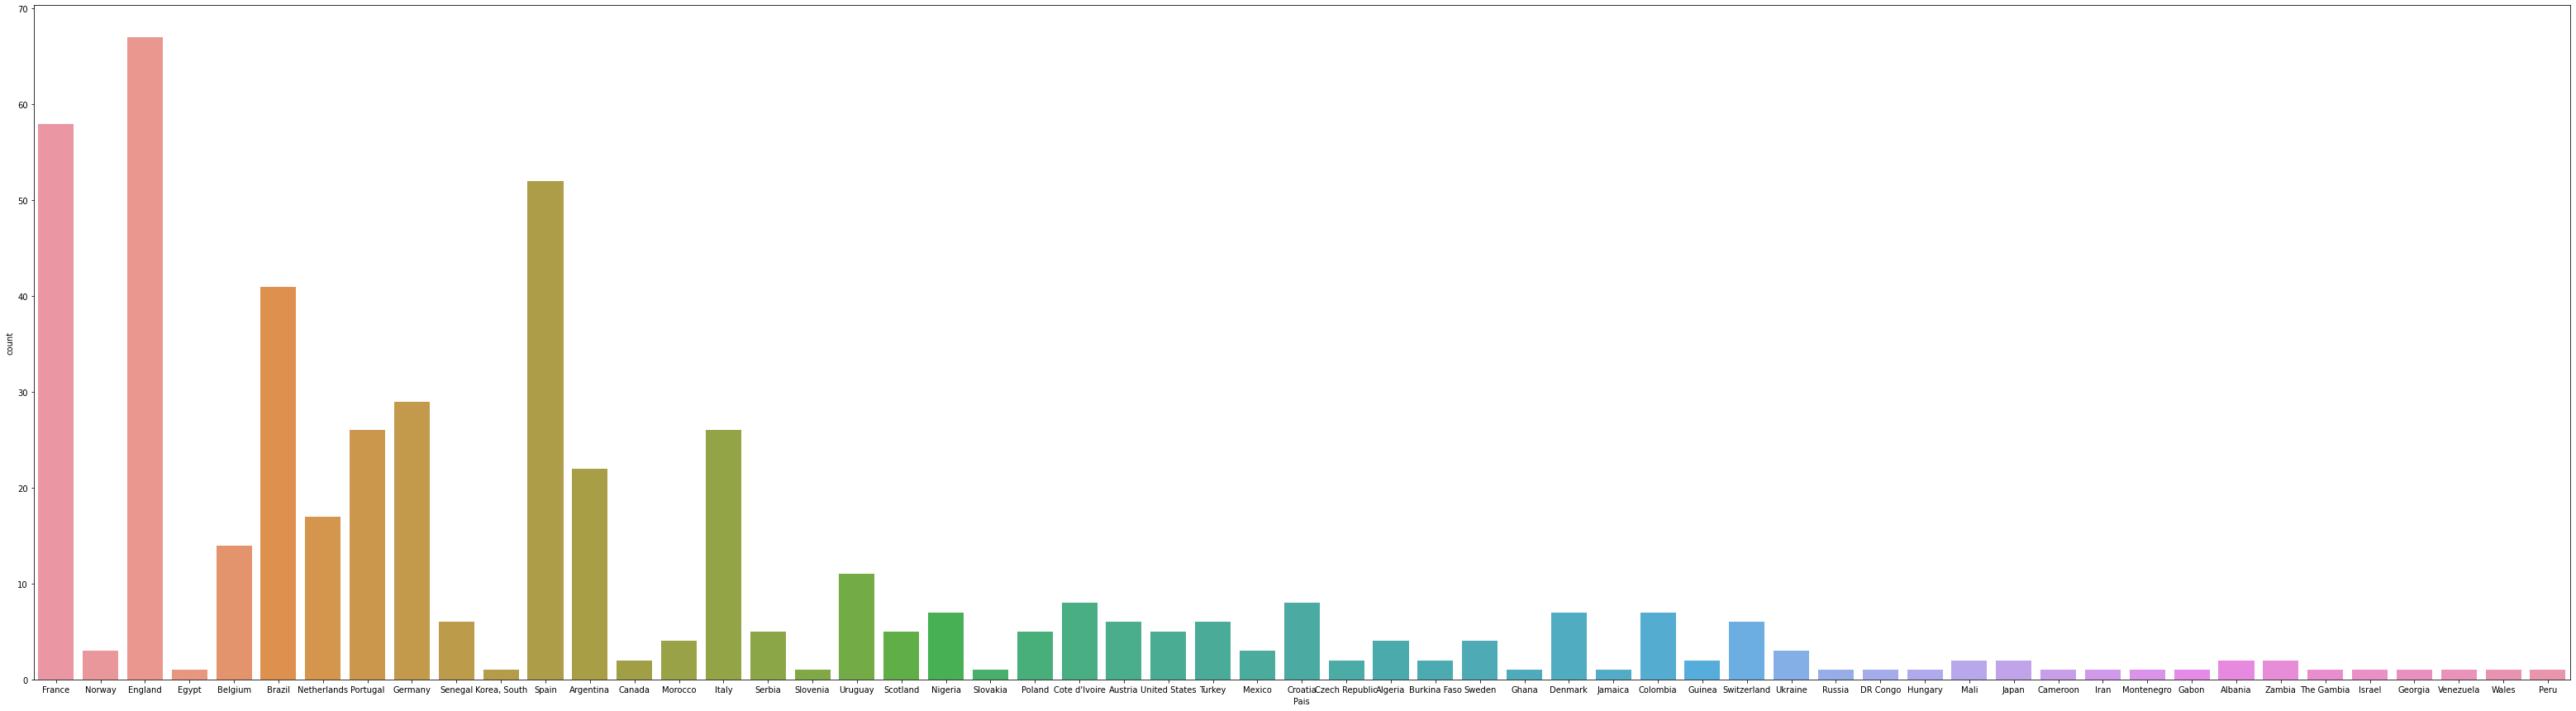

In [15]:

plt.figure(figsize=(55,15))
sns.countplot(data=futbolistas,x='Pais')

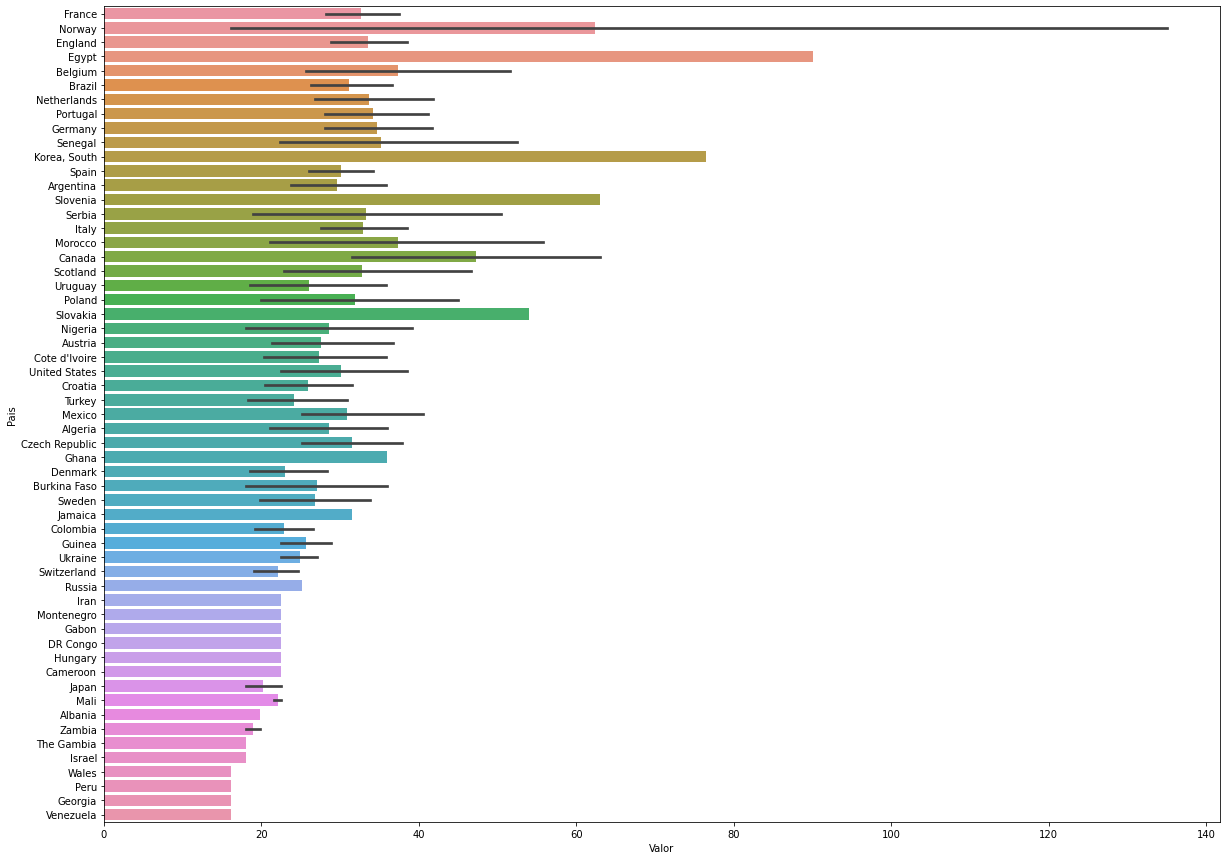

In [16]:

futbolistas.sort_values(by='Valor',ascending=False,inplace=True)
plt.figure(figsize=(20,15))
sns.barplot(data=futbolistas, y='Pais',x='Valor')

##Vemos como interfire a posición no valor do xogador

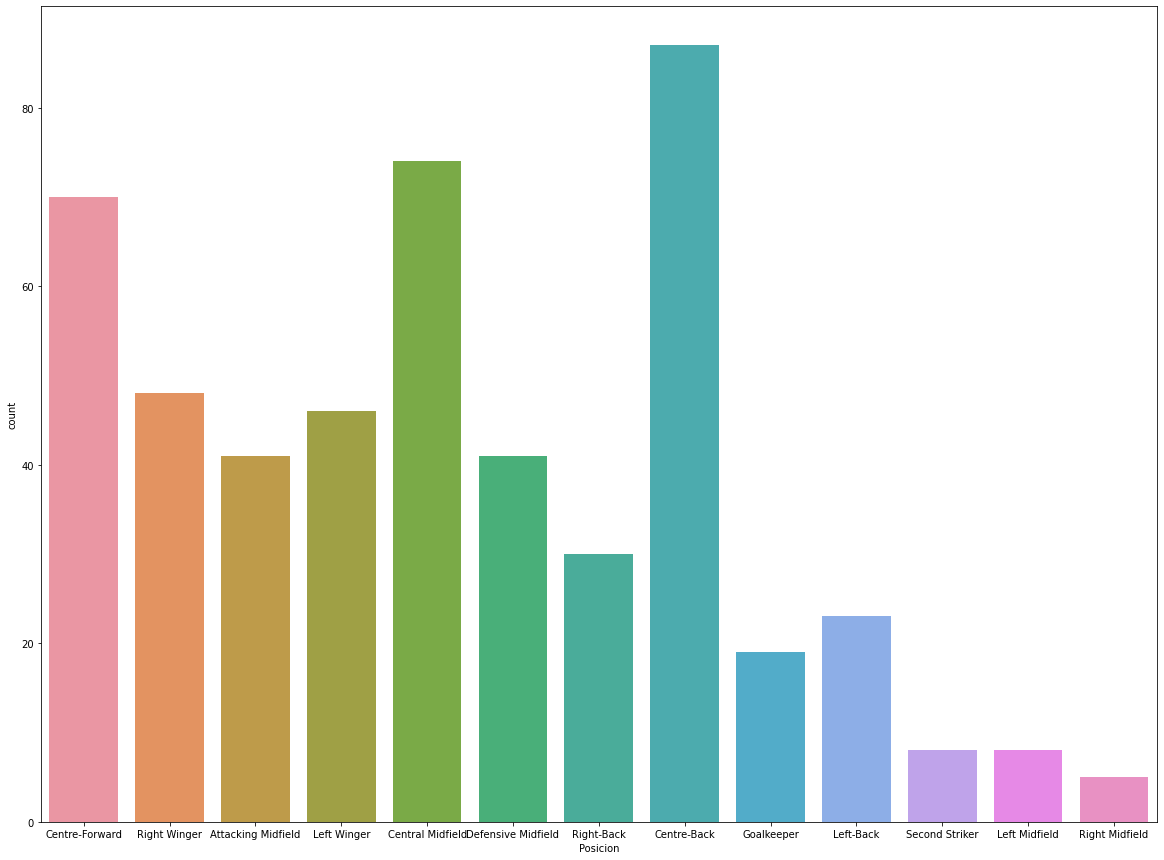

In [17]:
plt.figure(figsize=(20,15))
sns.countplot(data=futbolistas,x='Posicion')

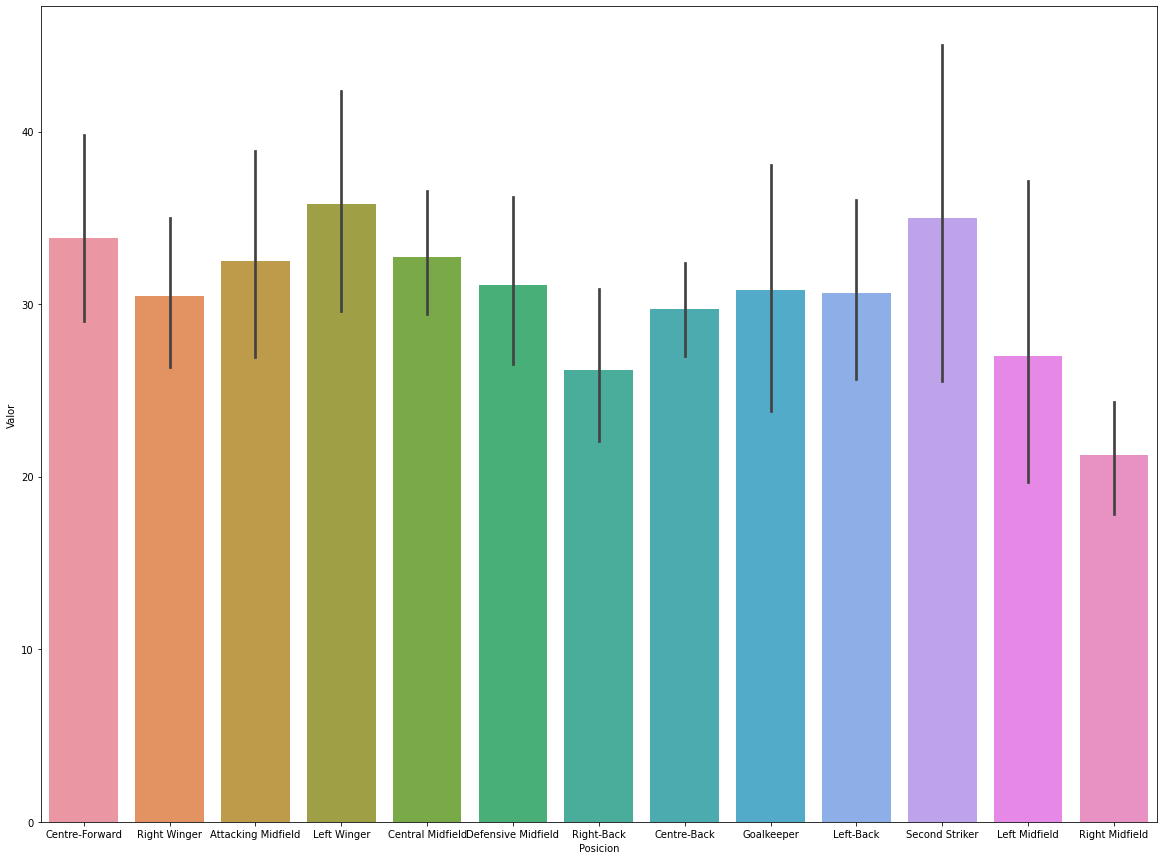

In [18]:

plt.figure(figsize=(20,15))
sns.barplot(data = futbolistas, x = 'Posicion', y= 'Valor')

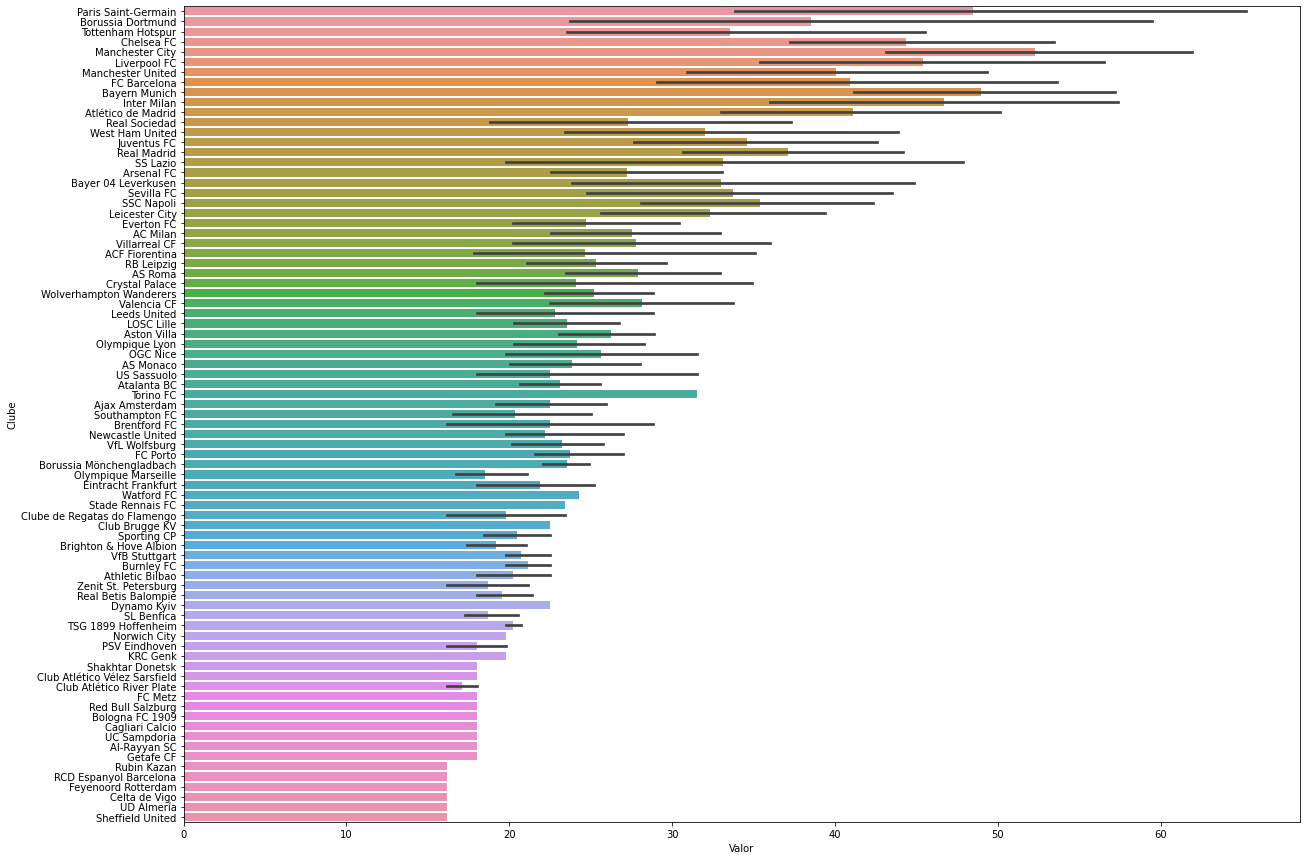

In [19]:
futbolistas.sort_values(by='Valor',ascending=False,inplace=True)
plt.figure(figsize=(20,15))
sns.barplot(data=futbolistas, y='Clube',x='Valor')

##Vendo as gráficas podemos decir que os xogadores máis valiosos son segundos dianteiros ou estremos esquerdos, e que xogan en equipos da Champions

#Análise e distribucción das variables numéricas

In [20]:
futbolistas.describe()

,Id,Idade,Valor,Partidos,Goles,En_Propia,Asistencias,Amarelas,Segunda_Amarela,Vermella,Entrada_dendebanco,Cambiado
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,24.968000,31.537800,12.396000,2.160000,0.030000,1.51200,1.592000,0.036000,0.046000,2.394000,3.744000
std,144.481833,3.165916,17.577697,4.342453,2.880102,0.170758,1.85276,1.445585,0.186477,0.209695,2.517825,3.293046
min,0.000000,16.000000,16.200000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124.750000,23.000000,19.800000,10.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,249.500000,25.000000,25.200000,13.000000,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,2.000000,3.000000
75%,374.250000,27.000000,36.000000,16.000000,3.000000,0.000000,2.00000,2.000000,0.000000,0.000000,3.250000,6.000000
max,499.000000,36.000000,144.000000,24.000000,23.000000,1.000000,12.00000,7.000000,1.000000,1.000000,13.000000,20.000000
